In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as spo
from numpy import trapz
from scipy.integrate import simps

In [74]:
data_free=np.loadtxt("EigFreq_air.txt",skiprows=13)
data_e_f_mua=np.loadtxt("MUA_Binding.txt",skiprows=13)
data_b_f_CCC=np.loadtxt("CytC_correct.txt",skiprows=13)
# 0 freq / 1 resistance / 2 delta F / 3 delta R / 4 delta M / 5 time(s) / 6 Tag

In [78]:
def log(x,a,b,c,d):
    return a*np.log(b*x-c)+d

def e(x,a,b,c):
    return a*np.exp(b*x)+c

def linear(x,a,b):
    return a*x+b

In [88]:
#fit=spo.curve_fit(log,data_free[100:,5],data_free[100:,0],[10,1000,-1,10])[0]
fit=spo.curve_fit(linear,data_free[100:900,5],data_free[100:900,0],[0,5015300])
print("fit1 =",fit[0])
print(fit[0][1])
fit2=spo.curve_fit(linear,data_free[1050:1400,5],data_free[1050:1400,0],[0,5014600])
print("fit2 =",fit2[0])
#print(fit[1])
#fit=fit[0]


fit1 = [-3.23163326e-03  5.01530596e+06]
5015305.962611439
fit2 = [-2.07709681e-02  5.01460943e+06]


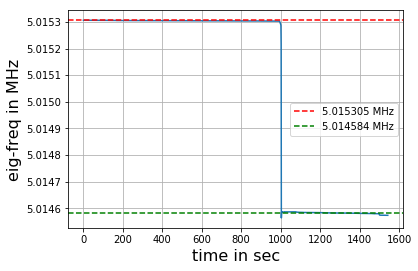

In [102]:
plt.plot(data_free[:,5],data_free[:,0]/10**(6))
#plt.plot(np.arange(10,1000),log(np.arange(10,1000),*fit))
#plt.plot(np.arange(100,1500),linear(np.arange(100,1500),*fit))
#plt.plot(np.arange(100,1500),linear(np.arange(100,1500),*fit2))
plt.axhline(fit[0][1]/10**(6),linestyle='dashed',c='red',label='5.015305 MHz')
plt.axhline((fit2[0][1]-25)/10**(6),linestyle='dashed',c='green',label='5.014584 MHz')
plt.grid()
plt.legend()
#print(fit[2])
plt.xlabel('time in sec',fontsize=16)
plt.ylabel('eig-freq in MHz',fontsize=16)
plt.savefig('air_ethanol_shift.pdf',bbox_inches="tight",pad_inches=0.05)
plt.show()

### Voltamogramm

In [4]:
data=[]
for i in range(1,6):
    data.append(np.loadtxt(str(i)+".ocw",skiprows=2))

In [5]:
datam=np.mean(np.array(data),axis=0)
print(datam)
print(np.max(datam[:,0]))
#print(datam[:,1])

[[-2.00042700e-01 -2.27838140e-07]
 [-1.97601300e-01 -2.09796160e-07]
 [-1.95159900e-01 -1.93841560e-07]
 [-1.92718500e-01 -1.84942640e-07]
 [-1.90277100e-01 -1.73730440e-07]
 [-1.87835700e-01 -1.66473400e-07]
 [-1.85394300e-01 -1.57727040e-07]
 [-1.82952900e-01 -1.51361080e-07]
 [-1.80511500e-01 -1.44183340e-07]
 [-1.78070100e-01 -1.37164300e-07]
 [-1.75628700e-01 -1.33654780e-07]
 [-1.73187300e-01 -1.26055900e-07]
 [-1.70745800e-01 -1.22027560e-07]
 [-1.68304400e-01 -1.16400180e-07]
 [-1.65863000e-01 -1.11987300e-07]
 [-1.63421600e-01 -1.07464612e-07]
 [-1.60980200e-01 -1.02752688e-07]
 [-1.58538800e-01 -1.00134292e-07]
 [-1.56097400e-01 -9.42688020e-08]
 [-1.53656000e-01 -9.35241640e-08]
 [-1.51214600e-01 -8.75183080e-08]
 [-1.48773200e-01 -8.56750500e-08]
 [-1.46331800e-01 -8.14819320e-08]
 [-1.43890400e-01 -7.77404780e-08]
 [-1.41449000e-01 -7.54638700e-08]
 [-1.39007600e-01 -7.11547840e-08]
 [-1.36566200e-01 -7.04589860e-08]
 [-1.34124800e-01 -6.51672360e-08]
 [-1.31683300e-01 -6

In [8]:
def linear_fit(x):
    return (1.09582520e-07*1e6+1.94598380e-08*1e6)/(0.2003479+8.52966300e-02)*x+0.019073643683172922

In [10]:
def linear_fit2(x):
    return (2.20336916e-09*1e6+1.50646960e-07*1e6)/(1.10015900e-01+1.31683300e-01)*x-0.06737057451806615

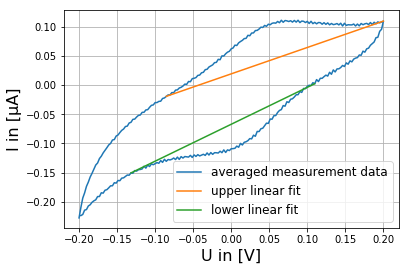

In [13]:
#plt.figure(figsize=(12,12))#plt.figure(figsize=(12,12))
plt.plot(datam.T[0],datam.T[1]*1e6,label='averaged measurement data')
plt.plot([-8.52966300e-02,0.2003479],[-1.94598380e-08*1e6,1.09582520e-07*1e6],label='upper linear fit')
#plt.plot(fitrange,wertelist,label='upper linear fit')
plt.plot([-1.31683300e-01,1.10015900e-01],[-1.50646960e-07*1e6,2.20336916e-09*1e6],label='lower linear fit')
plt.xlabel("U in [V]",fontsize=16)
plt.ylabel("I in [µA]",fontsize=16)
plt.grid()
#plt.ylim(-0.9,0.6)
#plt.xlim(-0.25,0.25)
plt.legend(loc="lower right",fontsize=12)
plt.savefig('cycvol.pdf',bbox_inches="tight",pad_inches=0.05)
plt.show()

### some calculation for enclosed areas between averaged measurement data and linear fits

In [14]:
dxes=[]
for i in np.arange(47,164,1):
    dxes.append(datam.T[0][i+1]-datam.T[0][i])

In [15]:
np.sum(dxes)/len(dxes)

0.002441406239316239

In [16]:
y_upper=[]
for i in np.arange(48,163,1):
    y_upper.append(abs(datam.T[1][i]-linear_fit(datam.T[0][i])))

In [17]:
area_upper = trapz(y_upper, dx=0.002441410000000005)
print("area =", area_upper)

area = 0.013134540765884639


In [18]:
dxes2=[]
for i in np.arange(201,300,1):
    dxes2.append(datam.T[0][i+1]-datam.T[0][i])

In [19]:
abs(np.sum(dxes2)/len(dxes2))

0.002441406060606061

In [20]:
y_lower=[]
for i in np.arange(202,299,1):
    y_lower.append(abs(datam.T[1][i]-linear_fit2(datam.T[0][i])))

In [21]:
area_lower = trapz(y_lower, dx=0.0024413999999999825)
print("area =", area_lower)

area = 0.017216352082059575


In [26]:
lo=area_lower/(1.602176634*10**(-19))
print(lo)

1.0745601774928627e+17


In [27]:
up=area_upper/(1.602176634*10**(-19))
print(up)

8.197935537914378e+16


In [24]:
middle=(lo+up)/2

In [25]:
print(middle)

9.471768656421502e+16
